# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
data = {'Age': [17,51,27,21,36,48,19,26,54,30],
        'Tardles': [10,1,5,9,4,2,9,6,0,3]
        }

df = pd.DataFrame(data, columns = ['Age', 'Tardles'])
df

,Age,Tardles
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

AxesSubplot(0.125,0.125;0.775x0.755)


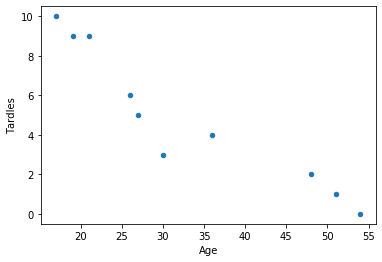

In [3]:
ax1 = df.plot.scatter(x='Age',
                      y='Tardles')
print(ax1)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
"""
Yes, I see a negative trend, 
which seems to confirm the theory that the younger the students are, 
the more often they are late to class.
"""

'\nYes, I see a negative trend, \nwhich seems to confirm the theory that the younger the students are, \nthe more often they are late to class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
#correlation:
df.corr()

,Age,Tardles
Age,1.000000,-0.939163
Tardles,-0.939163,1.000000


In [6]:
#covariance:
df.cov()

,Age,Tardles
Age,187.655556,-45.566667
Tardles,-45.566667,12.544444


In [7]:
"""
The correlation provides the direction and strength of the linear relationship between two variables.
The covariance describes only the direciton the linear correlation between both variables and not the strength.
"""

'\nThe correlation provides the direction and strength of the linear relationship between two variables.\nThe covariance describes only the direciton the linear correlation between both variables and not the strength.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
x = df['Age']
y = df['Tardles']

regression = stats.linregress(x,y)
regression

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

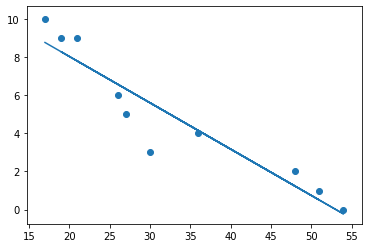

In [9]:
plt.plot(x, regression[0]*x + regression[1])
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Yes. We have a rvalue of -0,939 which indicates a strong negative correlation. Age seems to be a good predictor of tardiness.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
cars = pd.read_csv('vehicles.csv')
cars

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

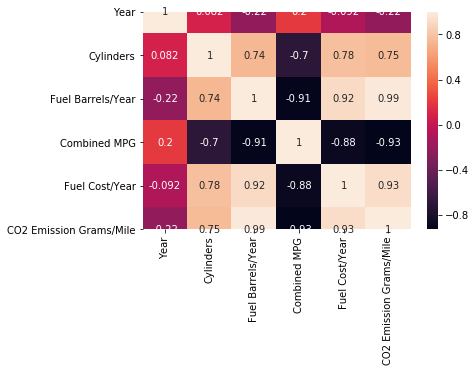

In [12]:
cars = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
cars_corr = cars.corr()
sb.heatmap(cars_corr, annot=True)
plt.show()

In [13]:
"""
Cylinders, Fuel Barrels/Year, Combined MPG and Fuel Cost/Year seem to be the most important variables in terms
of determining CO2 emissions, since these are the ones that show a closer correlation to 1 or -1, while Year
doesn't seem very important.
"""

"\nCylinders, Fuel Barrels/Year, Combined MPG and Fuel Cost/Year seem to be the most important variables in terms\nof determining CO2 emissions, since these are the ones that show a closer correlation to 1 or -1, while Year\ndoesn't seem very important.\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
x = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = cars['CO2 Emission Grams/Mile']

x = sm.add_constant(x.values)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 09 May 2020   Prob (F-statistic):               0.00
Time:                             13:51:51   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        769.8883     19.392     39.702      0.000     731.880     807.897
x1            -0.3206      0.010    -33.060      0.000      -0.340      -0.302
x2             1.8788      0.083     22.598      0.000       1.716       2.042
x3            19.0529      0.061    311.600      0.000      18.933      19.173
x4            -3.0404      0.042    -71.645      0.000      -3.124      -2.957
x5             0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
"""
The variable of the model that seems to impact CO2 Emission Grams/Mile
the most is Fuel Barrels per year (x3), with the highest coefficient.
An additional Year and Fuel Barrels/Year
All the variables have a 0 p-value which indicates they are a good fit to the model.
"""

'\nThe variable of the model that seems to impact CO2 Emission Grams/Mile\nthe most is Fuel Barrels per year (x3), with the highest coefficient.\nAll the variables have a 0 p-value which indicates they are a good fit to the model.\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
parties = {'Invited': [1,3,4,6,8,9,11,14],
        'Attended': [1,2,4,4,5,7,8,13]
        }

table_parties = pd.DataFrame(parties, columns = ['Invited', 'Attended'])
table_parties

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

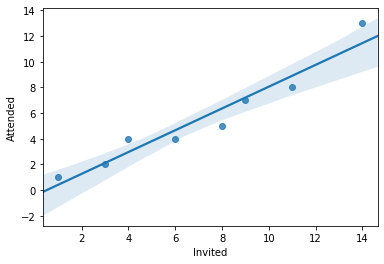

In [18]:
sb.regplot('Invited', 'Attended', data=table_parties)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
#They may have a positive linear relationship. 

In [27]:
x = table_parties['Invited']
y = table_parties['Attended']

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Attended   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Sat, 09 May 2020   Prob (F-statistic):                    4.20e-07
Time:                        13:52:04   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Invited        0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

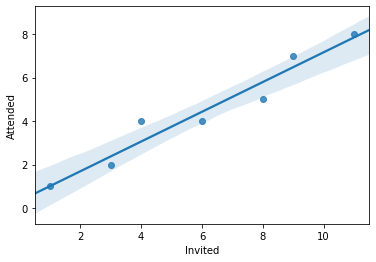

In [29]:
# Yes, the (x= 14, y = 13) point seems to be an outlier.

new_parties = {'Invited': [1,3,4,6,8,9,11],
        'Attended': [1,2,4,4,5,7,8]
        }

new_table_parties = pd.DataFrame(new_parties, columns = ['Invited', 'Attended'])

sb.regplot('Invited', 'Attended', data=new_table_parties)
plt.show()

In [30]:
x = new_table_parties['Invited']
y = new_table_parties['Attended']

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

In [31]:
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Attended   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              449.6
Date:                Sat, 09 May 2020   Prob (F-statistic):                    7.18e-07
Time:                        13:52:12   Log-Likelihood:                         -6.0445
No. Observations:                   7   AIC:                                      14.09
Df Residuals:                       6   BIC:                                      14.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Invited        0.7256      0.034     21.203      0.000       0.642       0.809
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.588
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.199
Skew:                           0.282   Prob(JB):                        0.905
Kurtosis:                       2.395   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [32]:
# It improved. R-squared is now higher.